<form action="https://nbviewer.jupyter.org/github/prmiles/notebooks/blob/master/pyfod/index.ipynb">
    <input type="submit" value="Return to Index" style="background-color: green; color: white; width: 150px; height: 35px; float: right"/>
</form>

# Integral Convergence Tests for [pyfod](https://github.com/prmiles/pyfod/wiki)
Author(s): Graham T. Pash, Paul R. Miles | April 20, 2019

The Riemann-Liouville definition of the fractional derivative contains the integral with singular kernal,
$$
\int_{t_0}^{t} \frac{f(s)}{(t-s)^\alpha}ds
$$
where $\alpha$ is the fractional order. For simplicity, we restrict $\alpha\in [0,1)$. In general, all quadrature methods may be represented as 
$$
\int_{t_0}^t f(x)dx = \sum\limits_{i=1}^N f(x_i)w_i 
$$
where $x_i$ and $w_i$ denote the nodes and weights, respectively. A variety of quadrature methods are assessed for the Riemann-Liouville integrand:
- Riemann-Sum
- Gauss-Legendre
- Gauss-Laguerre

To properly assess the viability of each numerical method, we compare their performance on several test problems.

**Note:** Current examples generated using development branch of repository.

# Example
Consider the function
$$
f(t) = \exp (2t)
$$

In [1]:
import numpy as np
def f(t):
    return np.exp(2*t)

where $t\in [0,1]$ and $\alpha = 0.9$. Using [Mathematica](https://www.wolfram.com/mathematica/) the exact value of the singular kernal may be found,
$$
\int_0^1 \frac{\exp (2t)}{(1-s)^{0.9}}ds = 65.2162\dots
$$

In [2]:
alpha = 0.9
t0 = 0.
tend = 1.

# Riemann-Sum Quadrature
Consider a Riemann-Sum approach where the function is approximately constant on small enough sub-intervals
$$
\int_{t_0}^{t_{n}}(t_{n} - s)^{-\alpha}f(s)ds  \approx  \sum_{k=0}^{n-1} f(x_k)w_k
$$
where 
$$
x_k = \frac{t_{k+1} + t_k}{2}, \; w_k = \int_{t_k}^{t_{k+1}}(t_{n} - s)^{-\alpha}ds
$$
The weights may be computed analytically (assuming $\alpha <1$):
$$
w_k = \frac{-1}{1-\alpha}\Big[(t_{n}-t_{k+1})^{1-\alpha} - (t_{n}-t_k)^{1-\alpha}\Big]
$$

In [3]:
import pyfod
from pyfod.quadrature import RiemannSum as RS
out = RS(f=f, alpha=alpha, lower=t0, upper=tend).integrate()
print('Int[exp(2s)/(1-s)^0.9] = {}'.format(out))

Int[exp(2s)/(1-s)^0.9] = 53.45905083850196


Using the default options does not provide an accurate approximation for the singular kernel. To improve the approximation, we can refine the quadrature mesh.

In [4]:
from time import time
xstar = 65.2162 # true solution
nodes = np.exp2(range(1, 11)).astype(int)
xhat = []
error = []
runtime = []
nruns = 100
print('Running Riemann Sum for Int(exp(2t)/(1-t)^{})'.format(alpha))
print('RS Nodes\tRel. Error')
for N in nodes:
    st = time()
    for i in range(nruns):
        if i==0:
            xhat.append(RS(f=f, alpha=alpha, lower=t0, upper=tend, n=N).integrate())
        else:
            RS(f=f, alpha=alpha, lower=t0, upper=tend).integrate()
    et = time()
    error.append(np.abs(xstar-xhat[-1])/np.abs(xstar))
    runtime.append((et-st)/nruns)
    print('{}\t\t{}'.format(N,error[-1]))
    
# store output
out = dict(rs=dict(nodes=nodes, xhat=np.array(xhat), error=np.array(error),
                   runtime=np.array(runtime),
                   plot=dict(marker='s', color='r', linewidth=2,
                            markersize=10, mfc='none',
                            label='Riemann-Sum')))

Running Riemann Sum for Int(exp(2t)/(1-t)^0.9)
RS Nodes	Rel. Error
2		0.5831891725584984
4		0.23732133269782166
8		0.1028871575413055
16		0.046312549696904036
32		0.021233984978914742
64		0.009822993619213589
128		0.004563934543633586
256		0.0021249419080308428
512		0.0009903575343785452
1024		0.0004617832837065931


# Gauss-Legendre Composite Quadrature
Next, we consider using an Composite [Gauss-Legendre](http://mathworld.wolfram.com/Legendre-GaussQuadrature.html) quadrature scheme, where we may specify the number of subdomains as well as the degree of the quadrature on each subdomain. For simplicity, we take one domain for this example.

In [5]:
from pyfod.quadrature import GaussLegendre as GLeg
nodes = np.exp2(range(1, 11)).astype(int)
xhat = []
error = []
runtime = []
nruns = 100
print('Running n-point Gauss-Legendre for Int(exp(2t)/(1-t)^{})'.format(alpha))
print('Gauss-Legendre Degree\t\tRel. Error')
for N in nodes:
    st = time()
    for i in range(nruns):
        if i==0:
            xhat.append(GLeg(f=f, alpha=alpha, lower=t0, upper=tend, ndom=1, deg=N).integrate())
        else:
            GLeg(f=f, alpha=alpha, lower=t0, upper=tend, ndom=1, deg=N).integrate()
    et = time()
    error.append(np.abs(xstar-xhat[-1])/np.abs(xstar))
    runtime.append((et-st)/nruns)
    print('{}\t\t\t\t{}'.format(N,error[-1]))
    
# store output
out['gleg'] = dict(dict(nodes=nodes, xhat=np.array(xhat), error=np.array(error),
                   runtime=np.array(runtime),
                   plot=dict(marker='o', color='b', linewidth=2,
                            markersize=10, mfc='none',
                            label='Gauss-Legendre')))

Running n-point Gauss-Legendre for Int(exp(2t)/(1-t)^0.9)
Gauss-Legendre Degree		Rel. Error
2				0.8351324137645192
4				0.7418836140985944
8				0.6531279381389729
16				0.5719523926080966
32				0.49942852170923446
64				0.4354480506336105
128				0.3793737046811267
256				0.33039256018219326
512				0.28767950465776815
1024				0.2504639849314749


Alternatively, one may employ a composite quadrature rule, with a lower order quadrature on each subdomain. For more details, the reader is referred to Chapter 8 of Smith, Ralph C. *Smart material systems: model development*. Society for Industrial and Applied Mathematics, 2005.

In [6]:
from pyfod.quadrature import GaussLegendre as GLeg
nodes = np.exp2(range(1, 11)).astype(int)
xhat = []
error = []
runtime = []
nruns = 100
print('Running Composite 4-point Gauss-Legendre for Int(exp(2t)/(1-t)^{})'.format(alpha))
print('Gauss-Legendre Domains\t\tRel. Error')
for N in nodes:
    st = time()
    for i in range(nruns):
        if i==0:
            xhat.append(GLeg(f=f, alpha=alpha, lower=t0, upper=tend, ndom=N, deg=4).integrate())
        else:
            GLeg(f=f, alpha=alpha, lower=t0, upper=tend, ndom=N, deg=4).integrate()
    et = time()
    error.append(np.abs(xstar-xhat[-1])/np.abs(xstar))
    runtime.append((et-st)/nruns)
    print('{}\t\t\t\t{}'.format(N,error[-1]))

Running Composite 4-point Gauss-Legendre for Int(exp(2t)/(1-t)^0.9)
Gauss-Legendre Domains		Rel. Error
2				0.6919907995981719
4				0.6455536597976539
8				0.6022782269828033
16				0.5619247278293152
32				0.5242846604600446
64				0.4891703870357272
128				0.45641001062102216
256				0.42584461693718817
512				0.3973266177335165
1024				0.37071862686329243


# Gauss-Laguerre Quadrature
To better accomodate the singular kernel, we have implemented [Gauss-Laguerre](http://mathworld.wolfram.com/Laguerre-GaussQuadrature.html) quadrature mapped to the interval $[t_0,t_f]$ from the original domain $[0,\infty)$. The user may specify the number of nodes to employ. The mapping is accomplished with the following u-substitution:
$$
\int_{t_0}^{t_n} \frac{f(s)}{(t_n-s)^{\alpha}} ds = \int_0^1 \frac{f((t_n-t_0)u + t_0)}{(t_n-t_0)^{1-\alpha}(1-u)^{\alpha}}du
$$
where $u = \frac{s-t_0}{t_n-t_0}$; $ds = (t_n-t_0)du$; $u(s=t_0) = 0, u(s=t_n)=1$ We obtain the expressions for the quadrature nodes and weights:
$$
x_k = (t_n-t_0)(1-e^{-x^*_k}) + t_0
$$
$$
w_k = (t_n-t_0)^{1-\alpha}(1-x_k)^{-\alpha}w^*_i
$$
$x^*,w^*$ denote the typical Gauss-Laguerre nodes and weights and the $1-e^{-x_k^*}$ operation maps the the nodes from $[0,\infty) \rightarrow [t_0,t_1)$.

In [7]:
from pyfod.quadrature import GaussLaguerre as GLag
nodes = np.exp2(range(1, 5)).astype(int)
xhat = []
error = []
runtime = []
nruns = 100
print('Running Gauss-Laguerre for Int(exp(2t)/(1-t)^{})'.format(alpha))
print('Gauss-Laguerre Nodes\t\tRel. Error')
for N in nodes:
    st = time()
    for i in range(nruns):
        if i==0:
            xhat.append(GLag(f=f, alpha=alpha, lower=t0, upper=tend, deg=N, extend_precision=False).integrate())
        else:
            GLag(f=f, alpha=alpha, lower=t0, upper=tend, extend_precision=False).integrate()
    et = time()
    error.append(np.abs(xstar-xhat[-1])/np.abs(xstar))
    runtime.append((et-st)/nruns)
    print('{}\t\t\t\t{}'.format(N,error[-1]))
# drop the nan
xhat = xhat[0:-1]
error = error[0:-1]
runtime = runtime[0:-1]

Running Gauss-Laguerre for Int(exp(2t)/(1-t)^0.9)
Gauss-Laguerre Nodes		Rel. Error
2				0.6105769787672501
4				0.2980414778559573
8				0.06665016549538749
16				inf


/root/envs/pyfod/lib/python3.6/site-packages/pyfod-0.0.0rc2-py3.6.egg/pyfod/quadrature.py:140: RuntimeWarning: divide by zero encountered in power
  coef = span**(1-alpha)*(1-self.points)**(-alpha)


Note that the computation of the nodes and weights for Gauss-Laguerre quadrature requires the use of extended precision to avoid numerical overflow. To implement this, we have utilized the symboic toolkit in Python, `sympy`.

In [8]:
import sympy as sp

# define sympy compatible function
def fsp(t):
    return sp.exp(2*t)

nruns = 10
ep_digits = 64 # octuple precision
nodes = np.exp2(range(4,7)).astype(int)
print('Running Gauss-Laguerre for Int(exp(2t)/(1-t)^{}) with Extended Precision'.format(alpha))
print('Gauss-Laguerre Nodes\t\tRel. Error')
for N in nodes:
    st = time()
    for i in range(nruns):
        if i==0:
            xhat.append(GLag(f=fsp, alpha=alpha, lower=t0, upper=tend, deg=N, extend_precision=True, n_digits=ep_digits).integrate())
        else:
            GLag(f=fsp, alpha=alpha, lower=t0, upper=tend, deg=N, extend_precision=True, n_digits=ep_digits).integrate()
    et = time()
    error.append(np.abs(xstar-xhat[-1])/np.abs(xstar))
    runtime.append((et-st)/nruns)
    print('{}\t\t\t\t{}'.format(N,error[-1]))
    

# store output
xhat = xhat[0:-1]
error = error[0:-1]
runtime = runtime[0:-1]
out['glag'] = dict(dict(nodes=np.exp2(range(1,6)).astype(int), xhat=np.array(xhat), error=np.array(error),
                   runtime=np.array(runtime),
                   plot=dict(marker='d', color='k', linewidth=2,
                            markersize=10, mfc='none',
                            label='Gauss-Laguerre')))

Running Gauss-Laguerre for Int(exp(2t)/(1-t)^0.9) with Extended Precision
Gauss-Laguerre Nodes		Rel. Error
16				0.003063131454344597
32				5.777227402991027e-06
64				nan


*Caution:* Gauss-Laguerre quadrature may encounter numerical overflow issues with relatively few nodes, even when using extended precision! 

**Note:** Gauss-Laguerre quadrature performs particularly well for the singular kernels that are of interest when approximating the Riemann-Liouville fractional derivative as it clusters nodes closer to the singularity, thus better approximating the integral. This can be demonstrated graphically as shown below.

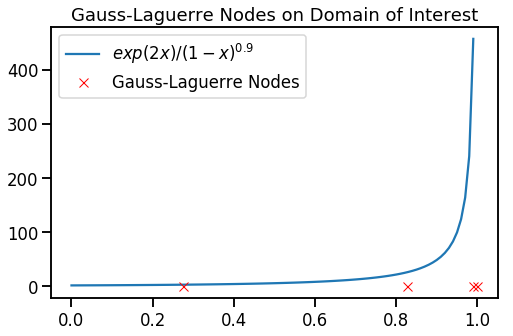

In [9]:
nodes, _ = np.polynomial.laguerre.laggauss(deg=4) # obtain generic points
nodes = (tend-t0)*(1-np.exp(-nodes))+t0 # map to domain of interest
x = np.linspace(t0, tend, 100, endpoint=False)
def ker(x, alpha, t):
    return f(x)*((t-x)**(-alpha))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
plt.figure(figsize=(8, 5))
plt.plot(x,ker(x, alpha=0.9, t=tend), label=r'$exp(2x)/(1-x)^{0.9}$')
plt.plot(nodes, np.zeros(len(nodes)), 'rx', label='Gauss-Laguerre Nodes')
plt.legend()
plt.title('Gauss-Laguerre Nodes on Domain of Interest')
plt.show()

<a id='grid-ref'></a>
[](#grid-ref)
# Grid-refinement Study

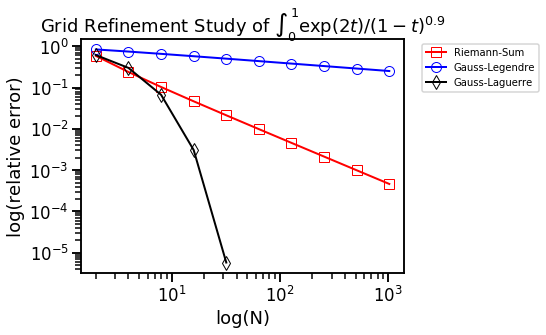

In [10]:
sns.set_context('talk')
plt.figure(figsize=(8,5))
for qm in out:
    plt.loglog(out[qm]['nodes'], out[qm]['error'], **out[qm]['plot'])
plt.xlabel('log(N)')
plt.ylabel('log(relative error)')
plt.title('Grid Refinement Study of $\int_0^1 \exp (2t)/(1-t)^{0.9}$')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=10)
plt.tight_layout()

## Computational Burden

**Discussion:** The results of the grid-refinement study above may be misleading as there is an associated overhead when setting up the extended precision enviornment for Gauss-Laguerre quadrature in particular. To have a clearer picture of the efficiency of each method, we investigate the associated run times.

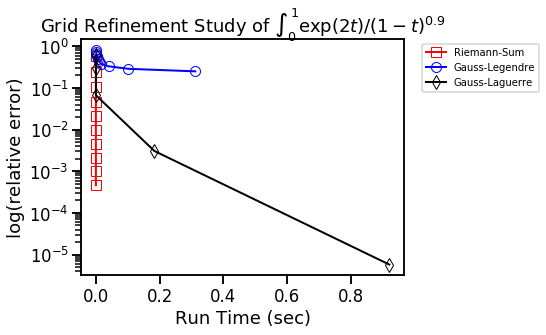

In [11]:
sns.set_context('talk')
plt.figure(figsize=(8,5))
for qm in out:
    plt.semilogy(out[qm]['runtime'], out[qm]['error'], **out[qm]['plot'])
plt.xlabel('Run Time (sec)')
plt.ylabel('log(relative error)')
plt.title('Grid Refinement Study of $\int_0^1 \exp (2t)/(1-t)^{0.9}$')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=10)
plt.tight_layout()

**Discussion:** The run time requirements for the methods that use Gauss-Laguerre are significantly larger. This is because the method requires the use of symbolic expressions and extended precision. That said, you can achieve extremely accurate results with relatively few terms as seen in the [previous figure](#grid-ref).